# Plotting with Pandas and Matplotlib

-----

### Learning Objectives
*After this lesson, you will be able to:*
- Implement different types of plots on a given dataset.

<!--
Talking points:
We will use Pandas and Matplotlib to create simple plots.
We'll cover plotting line plots, scatter plots, bar plots, and histograms, and a brief introduction on how to manipulate the style of your plots with Matplotlib.
-->

---------

## Recap

In the last lesson, we learned about when to use the different types of plots. Can anyone give an example of when we would use a:
 * line plot?
 * bar plot?
 * histogram?
 * scatter plot?

### Pandas and Matplotlib

<!--
Talking points:
In this lesson, we will introduce how plotting works in Pandas and Matplotlib. It is important to know that Pandas uses Matplotlib behind the scenes to make plots. So, you will notice that Pandas plotting methods often use similar parameter names as Matplotlib methods. Further, you can use Matplotlib functions in combination with Pandas methods to alter the plots after drawing them. For example, you can use Matplotlib's `xlabel` and `title` functions to label the plot's x-axis and title, respectively, after it is drawn.
-->

As we explore different types of plots, notice:

1. Different types of plots are drawn very similarly -- they even tend to share parameter names.
2. In Pandas, calling `plot()` on a `DataFrame` is different than calling it on a `Series`. Although the methods are both named `plot`, they may take different parameters.

*Sometimes Pandas can be a little frustrating... perserverence is key!*

<img src="https://media.giphy.com/media/EPcvhM28ER9XW/giphy.gif" width="200" align="left">

## Lesson Guide

- [Line Plots](#line-plots)
- [Bar Plots](#bar-plots)
- [Histograms](#histograms)
- [Scatter Plots](#scatter-plots)
- [Using Seaborn](#using-seaborn)
- [OPTIONAL: Understanding Matplotlib (Figures, Subplots, and Axes)](#matplotlib)
- [OPTIONAL: Additional Topics](#additional-topics)

- [Summary](#summary)

## Plotting with Pandas: How?

`<data_set>.<columns>.plot()`

**Note**: These are example plots on a ficticious dataset. We'll work with real ones in just a minute!

`population['states'].value_counts().plot()` creates:

![](https://exceljet.net/sites/default/files/styles/original_with_watermark/public/images/charttypes/line%20chart2.png?itok=lG1hqRu4)

## Plotting: Visualization Types

Line charts are default.

`# line chart`

`population['states'].value_counts().plot()`

For other charts:

`population['states'].plot(kind='bar')`

`population['states'].plot(kind='hist', bins=3);`

`population['states'].plot(kind='scatter', x='states', y='population')`

Let's try!

### Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# set the plots to display in the Jupyter notebook
%matplotlib inline

# change plotting colors per client request
plt.style.use('ggplot')

# Increase default figure and font sizes for easier viewing. TOTALLY OPTIONAL
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['font.size'] = 14

### Load in data sets for visualization

- [Football Records](https://www.kaggle.com/martj42/international-football-results-from-1872-to-2017): International football results from 1872 to 2018
- [Avocado Prices](https://www.kaggle.com/neuromusic/avocado-prices): Historical data on avocado prices and sales volume in multiple US markets
- [Chocolate Bar Ratings](https://www.kaggle.com/rtatman/chocolate-bar-ratings): Expert ratings of over 1,700 chocolate bars

These have been included in `./datasets` of this repo for your convenience.

In [2]:
import os
os.listdir()

['international_football_results.csv',
 'avocado.csv',
 'chocolate_ratings.csv',
 '04-plotting-with-pandas.ipynb',
 '.ipynb_checkpoints']

In [3]:
#load all three datasets
foot = pd.read_csv('international_football_results.csv')
choc = pd.read_csv('chocolate_ratings.csv')
avo = pd.read_csv('avocado.csv')

<a id="line-plots"></a>
## Line plots: Show the trend of a numerical variable over time
---


Let's focus on the football scores for starters.

In [4]:
foot.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [6]:
foot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39669 entries, 0 to 39668
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        39669 non-null  object
 1   home_team   39669 non-null  object
 2   away_team   39669 non-null  object
 3   home_score  39669 non-null  int64 
 4   away_score  39669 non-null  int64 
 5   tournament  39669 non-null  object
 6   city        39669 non-null  object
 7   country     39669 non-null  object
 8   neutral     39669 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


In [7]:
#Data preprocessing
# convert date column into datetime object
foot['date'] = pd.to_datetime(foot['date'])
foot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39669 entries, 0 to 39668
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        39669 non-null  datetime64[ns]
 1   home_team   39669 non-null  object        
 2   away_team   39669 non-null  object        
 3   home_score  39669 non-null  int64         
 4   away_score  39669 non-null  int64         
 5   tournament  39669 non-null  object        
 6   city        39669 non-null  object        
 7   country     39669 non-null  object        
 8   neutral     39669 non-null  bool          
dtypes: bool(1), datetime64[ns](1), int64(2), object(5)
memory usage: 2.5+ MB


We can extract the year by converting the date to a `datetime64[ns]` object, and then using the `pd.Series.dt.year` property to return the year (as an `int`). We'll learn more about this in future lessons.

In [8]:
#create a new column that extracts year from date
foot['year'] = foot['date'].dt.year
foot

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876
...,...,...,...,...,...,...,...,...,...,...
39664,2018-07-06,Uruguay,France,0,2,FIFA World Cup,Nizhny Novgorod,Russia,True,2018
39665,2018-07-06,Brazil,Belgium,1,2,FIFA World Cup,Kazan,Russia,True,2018
39666,2018-07-07,Sweden,England,0,2,FIFA World Cup,Samara,Russia,True,2018
39667,2018-07-07,Russia,Croatia,2,2,FIFA World Cup,Sochi,Russia,False,2018


We can then get the number of games played every year by using `pd.Series.value_counts`, and using the `sort_index()` method to ensure our year is sorted chronologically.

In [11]:
foot['year'].value_counts().sort_values(ascending=False).head(10)

2008    1087
2011    1077
2004    1059
2000    1022
2001    1014
2012    1009
2015    1001
2007     974
2013     960
2003     932
Name: year, dtype: int64

Using this date, we can use the `pd.Series.plot()` method to graph **count of games** against **year of game**:

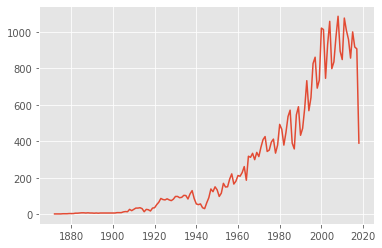

In [13]:
foot['year'].value_counts().sort_index().plot()

### Knowledge Check <img src="http://cdn.shopify.com/s/files/1/1061/1924/products/Up_Pointing_Hand_Emoji_grande.png?v=1480481048" width="30px" align="left">

Why does it make sense to use a line plot for this visualization? 

---

### Another example

---

In [15]:
#check number of games played in each country
foot['home_team'].value_counts().head()

Brazil       552
Argentina    535
Germany      495
Mexico       494
England      483
Name: home_team, dtype: int64

In [17]:
foot['country'].value_counts()

USA                  1087
France                775
England               659
Malaysia              634
Sweden                632
                     ... 
Greenland               2
Belgian Congo           1
Portuguese Guinea       1
Mali Federation         1
Micronesia FS           1
Name: country, Length: 265, dtype: int64

### Knowledge Check <img src="http://cdn.shopify.com/s/files/1/1061/1924/products/Up_Pointing_Hand_Emoji_grande.png?v=1480481048" width="30px" align="left">

Why would it **NOT** make sense to use a line plot for this visualization?

---

<a id="bar-plots"></a>
## Bar Plots: Show a numerical comparison across different categories
---

Count the number of games played in each country in the football dataset.

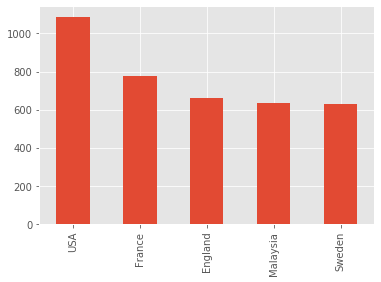

In [19]:
foot['country'].value_counts().head().plot(kind='bar')

Let's view the same information, but in a bar chart instead. Note we are using `.head()` to return the top 5. Also note that `value_counts()` automatically sorts by the value (read the docs!)

<a id="histograms"></a>
## Histograms: Show the distribution of a numerical variable
---


Let's change to the chocolate bar dataset.

In [21]:
choc.head()

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [22]:
choc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Company 
(Maker-if known)         1795 non-null   object 
 1   Specific Bean Origin
or Bar Name  1795 non-null   object 
 2   REF                               1795 non-null   int64  
 3   Review
Date                       1795 non-null   int64  
 4   Cocoa
Percent                     1795 non-null   object 
 5   Company
Location                  1795 non-null   object 
 6   Rating                            1795 non-null   float64
 7   Bean
Type                         1794 non-null   object 
 8   Broad Bean
Origin                 1794 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 126.3+ KB


### How would you split the `Rating` values into 3 equally sized bins?

In [23]:
choc['Rating'].unique()

array([3.75, 2.75, 3.  , 3.5 , 4.  , 3.25, 2.5 , 5.  , 1.75, 1.5 , 2.25,
       2.  , 1.  ])

Use a histogram! The `bins=n` kwarg allows us to specify the number of bins ('buckets') of values.

In [24]:
choc['REF']

0       1876
1       1676
2       1676
3       1680
4       1704
        ... 
1790     647
1791     749
1792     749
1793     781
1794     486
Name: REF, Length: 1795, dtype: int64

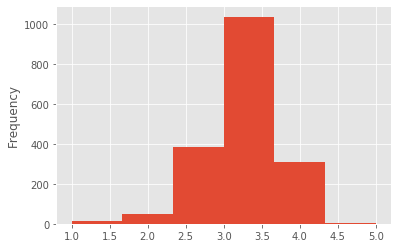

In [28]:
choc['Rating'].plot(kind='hist', bins=6)

Sometimes it is helpful to increase this number if you think you might have an outlier or a zero-weighted set.

Text(0.5, 0, 'Rating')

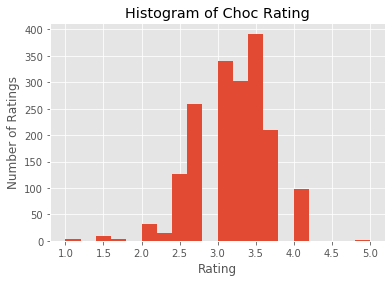

In [29]:
choc['Rating'].plot(kind='hist', bins=20)
#you can also label the axes by calling the plt object
plt.title('Histogram of Choc Rating')
plt.ylabel('Number of Ratings')
plt.xlabel('Rating')

### Knowledge check: 
What does the y-axis represent on a histogram? What about the x-axis? How would you explain a histogram to a non-technical person?

### Probability Distribution
This can be derived from the histogram easily. By looking at the count of bins/ total 

### Making histograms of an entire dataframe:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc50ac26cd0>,
      dtype=object)

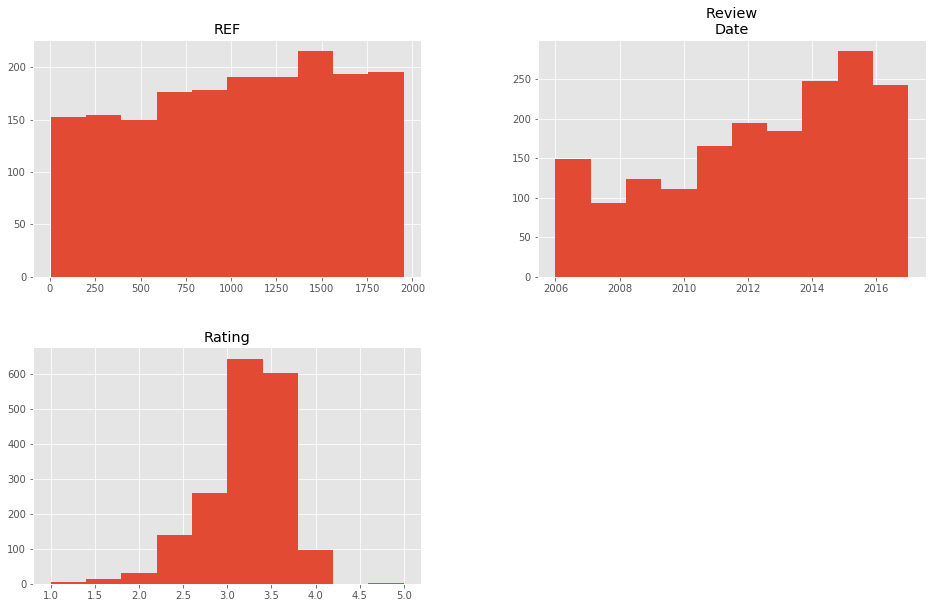

In [36]:
choc.hist(figsize=(16,10), bins=10)

In [32]:
choc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Company 
(Maker-if known)         1795 non-null   object 
 1   Specific Bean Origin
or Bar Name  1795 non-null   object 
 2   REF                               1795 non-null   int64  
 3   Review
Date                       1795 non-null   int64  
 4   Cocoa
Percent                     1795 non-null   object 
 5   Company
Location                  1795 non-null   object 
 6   Rating                            1795 non-null   float64
 7   Bean
Type                         1794 non-null   object 
 8   Broad Bean
Origin                 1794 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 126.3+ KB


### Why doesn't it make plots of ALL the columns in the dataframe?

Hint: what is different about the columns it plots vs. the ones it left out?

Let's take a look at the data types of all the columns:

It looks like it included `REF`, `Review Date`, and `Rating`. These have datatypes of `int64`, `int64`, and `float64` respectively. What do these all have in common, that is different from the other data types?
<br><br>
<details>
    <summary>Click for the answer!</summary>
    They're all **numeric!** The other columns are **categorical**, specifically string values.
</details>

We can filter on these types using the `select_dtypes()` DataFrame method (which can be very handy!)

In [ ]:
choc.select_dtypes(include='number').head()

### Challenge: create a histogram of the `Review Date` column, with 10 bins, and label both axes

---

Text(0, 0.5, 'Count of Date')

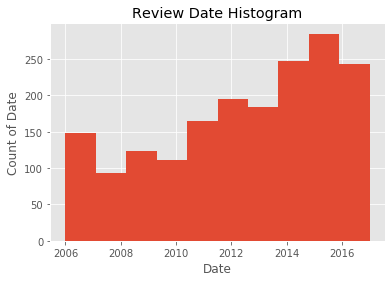

In [35]:
choc['Review\nDate'].plot(kind='hist', bins=10)
plt.title('Review Date Histogram')
plt.xlabel('Date')
plt.ylabel('Count of Date')

<a id="scatter-plots"></a>
## Scatter plots: Show the relationship between two numerical variables
---


Scatter plots are very good at showing the **interaction between two numeric variables** (especially when they're continuous)!

In [37]:
avo.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


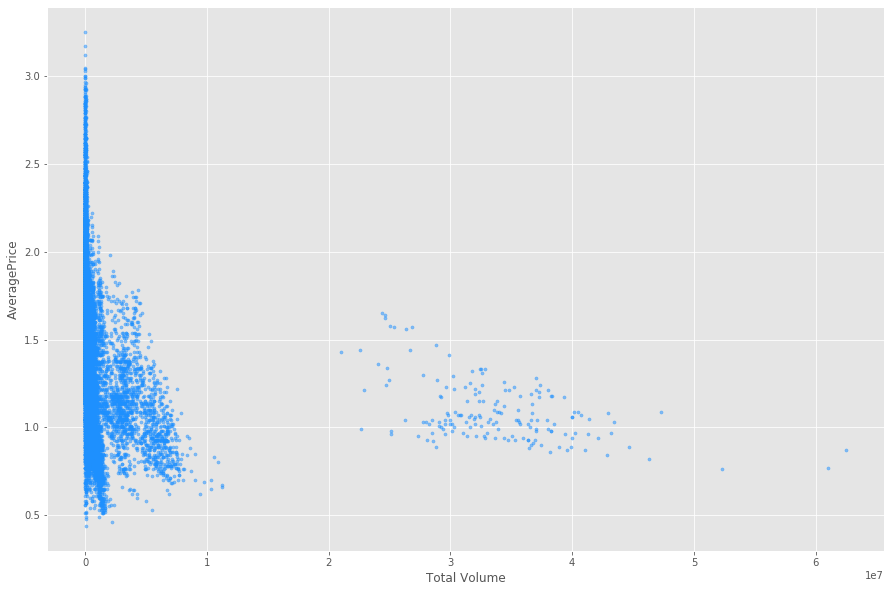

In [65]:
avo.plot(kind='scatter', x='Total Volume', y='AveragePrice', figsize = (15,10), color = 'dodgerblue',
        s=10, alpha=0.5)

Oh snap! What did we just make?! It's a [price elasticity curve!](https://en.wikipedia.org/wiki/Price_elasticity_of_demand)

<img src="https://upload.wikimedia.org/wikipedia/commons/3/36/Marshall_PED.png" align="left">

We can also use a thing called a **scatter matrix** or a **pairplot**, which is a grid of scatter plots. This allows you to quickly **view the interaction of N x M features**. You are generally looking for a trend between variables (a line or curve). Using machine learning, you can fit these curves to provide predictive power.

In [67]:
avo.iloc[:,-5:]

,XLarge Bags,type,year,region,type_binary
0,0.0,conventional,2015,Albany,0
1,0.0,conventional,2015,Albany,0
2,0.0,conventional,2015,Albany,0
3,0.0,conventional,2015,Albany,0
4,0.0,conventional,2015,Albany,0
...,...,...,...,...,...
18244,0.0,organic,2018,WestTexNewMexico,1
18245,0.0,organic,2018,WestTexNewMexico,1
18246,0.0,organic,2018,WestTexNewMexico,1
18247,0.0,organic,2018,WestTexNewMexico,1


In [68]:
avo[avo['type'] == 'conventional']

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,type_binary
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany,0
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany,0
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany,0
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany,0
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9121,7,2018-02-04,0.76,1272039.80,531469.08,368948.26,13078.20,358544.26,127833.03,229786.03,925.20,conventional,2018,WestTexNewMexico,0
9122,8,2018-01-28,0.85,957086.16,479147.93,179489.19,7314.98,291134.06,143430.96,147376.43,326.67,conventional,2018,WestTexNewMexico,0
9123,9,2018-01-21,0.84,1020913.20,505263.29,177911.40,9468.95,328269.56,118978.50,209131.06,160.00,conventional,2018,WestTexNewMexico,0
9124,10,2018-01-14,0.90,950954.60,463945.73,188126.02,11227.47,287655.38,125408.69,162040.02,206.67,conventional,2018,WestTexNewMexico,0


In [69]:
avo.select_dtypes(include='number').iloc[:,-5:]

,Small Bags,Large Bags,XLarge Bags,year,type_binary
0,8603.62,93.25,0.0,2015,0
1,9408.07,97.49,0.0,2015,0
2,8042.21,103.14,0.0,2015,0
3,5677.40,133.76,0.0,2015,0
4,5986.26,197.69,0.0,2015,0
...,...,...,...,...,...
18244,13066.82,431.85,0.0,2018,1
18245,8940.04,324.80,0.0,2018,1
18246,9351.80,42.31,0.0,2018,1
18247,10919.54,50.00,0.0,2018,1


In [70]:
numerics = ['float64', 'int64', 'float32']
avo.select_dtypes(include=numerics).iloc[:,-5:]

,Small Bags,Large Bags,XLarge Bags,year,type_binary
0,8603.62,93.25,0.0,2015,0
1,9408.07,97.49,0.0,2015,0
2,8042.21,103.14,0.0,2015,0
3,5677.40,133.76,0.0,2015,0
4,5986.26,197.69,0.0,2015,0
...,...,...,...,...,...
18244,13066.82,431.85,0.0,2018,1
18245,8940.04,324.80,0.0,2018,1
18246,9351.80,42.31,0.0,2018,1
18247,10919.54,50.00,0.0,2018,1


In [56]:
# to get the rows. use either iloc => index value (starts from 0) or loc => row index name (depends on the name)
avo.iloc[1]

Unnamed: 0                 1
Date              2015-12-20
AveragePrice            1.35
Total Volume        54876.98
4046                  674.28
4225                44638.81
4770                   58.33
Total Bags           9505.56
Small Bags           9408.07
Large Bags             97.49
XLarge Bags              0.0
type            conventional
year                    2015
region                Albany
type_binary                0
Name: 1, dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc50839f390>,
      dtype=object)

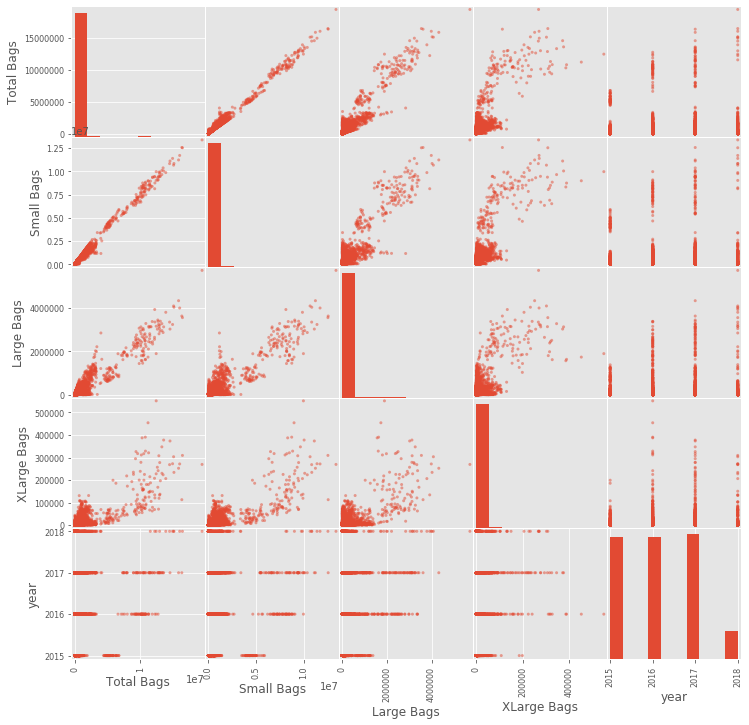

In [49]:
pd.plotting.scatter_matrix(avo.select_dtypes(include='number').iloc[:,-5:], figsize = (12,12))

We can also use a very handy parameter, `c`, which allows us to color the dots in a scatter plot. This is extremely helpful when doing **classification problems**, often you will set the color to the class label.

In [50]:
avo['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

Let's map the `type` field to the color of the dot in our price elasticity curve. To use the type field, we need to convert it from a string into a number. We can use `pd.Series.apply()` for this.

In [ ]:
# CREATE A NEW COLUMN, label conventional: 0, organic: 1 => creating new Features from dataset: Feature Engineering

We can see we have two unique type labels, `conventional` and `organic`. Although that is the case for this dataset, let's create a function that will store the labels in a dictionary, incrementing the number up by `1` for each new label. This way, if we receive an additional type label in the future, our code won't break. Always think about extensible code!

Now we can use this `mapping_dict` dictionary to map the values using `.apply()`:

In [52]:
avo['type_binary'] = avo['type'].apply(lambda x: 0 if x == 'conventional' else 1)
avo[['type','type_binary']]

,type,type_binary
0,conventional,0
1,conventional,0
2,conventional,0
3,conventional,0
4,conventional,0
...,...,...
18244,organic,1
18245,organic,1
18246,organic,1
18247,organic,1


Finally, we can use this **binary class label** as our `c` parameter to gain some insight:

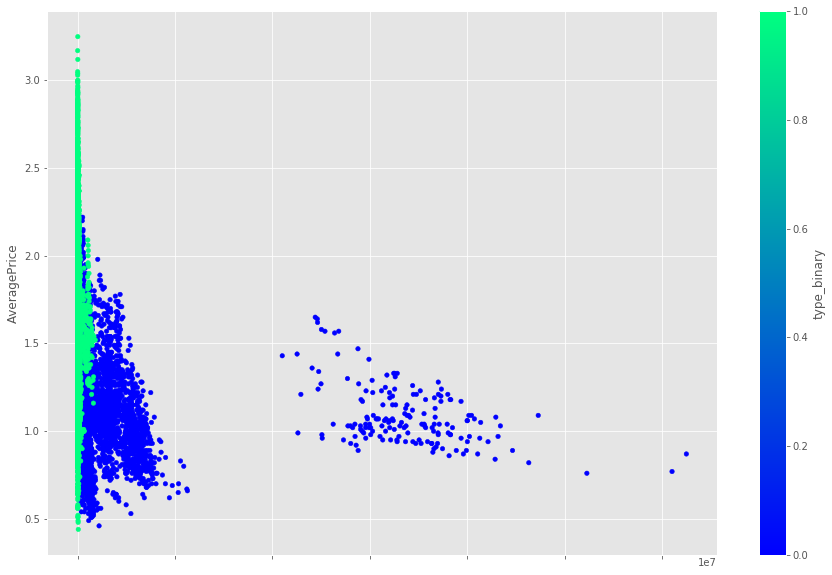

In [75]:
avo.plot(kind='scatter', x='Total Volume', y='AveragePrice', figsize = (15,10), c='type_binary', colormap='winter')
plt.savefig('avo_price.png')

Amazing! It looks like the organic avocados (value of `1`) totally occupy the lower volume, higher price bracket. Those dang kids with their toast and unicycles driving up the price of my 'cados!

Here, we can also see a 'more' continuous `c` parameter, `year`, which makes use of the gradient a little better. There are tons of gradients you can use, check them out [here](https://matplotlib.org/examples/color/colormaps_reference.html).

Finally, we can save the plot to a file, using the `plt.savefig()` method:

<a id="summary"></a>
### Summary

In this lesson, we showed examples of how to create a variety of plots using Pandas and Matplotlib. We also showed how to use each plot to effectively display data.

Do not be concerned if you do not remember everything — this will come with practice! Although there are many plot styles, many similarities exist between how each plot is drawn. For example, they have most parameters in common, and the same Matplotlib functions are used to modify the plot area.

We looked at:
- Line plots
- Bar plots
- Histograms
- Scatter plots

### Additional Resources

Always read the documentation!

- [Pandas Plotting Documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html)

- [Matplotlib Documentation](https://matplotlib.org/)

- [Matplotlib sample plots](https://matplotlib.org/tutorials/introductory/sample_plots.html)